In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
print("="*80)
print("E-COMMERCE SALES PREDICTION SYSTEM")
print("="*80)

E-COMMERCE SALES PREDICTION SYSTEM


In [ ]:
print("\n[STEP 1] Loading datasets...")

# Load all datasets
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

print(f"✓ Customers: {customers.shape}")
print(f"✓ Orders: {orders.shape}")
print(f"✓ Order Items: {order_items.shape}")
print(f"✓ Products: {products.shape}")
print(f"✓ Payments: {order_payments.shape}")
print(f"✓ Reviews: {order_reviews.shape}")



[STEP 1] Loading datasets...
✓ Customers: (99441, 5)
✓ Orders: (99441, 8)
✓ Order Items: (112650, 7)
✓ Products: (32951, 9)
✓ Payments: (103886, 5)
✓ Reviews: (99224, 7)


In [ ]:
print("\n[STEP 2] Exploring data and creating visualizations...")


[STEP 2] Exploring data and creating visualizations...


In [ ]:
# Convert date columns
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


In [ ]:
# Extract temporal features
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['day'] = orders['order_purchase_timestamp'].dt.day
orders['dayofweek'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['quarter'] = orders['order_purchase_timestamp'].dt.quarter

In [ ]:
# Create comprehensive sales dataset
sales_data = order_items.merge(orders[['order_id', 'customer_id', 'order_status', 
                                        'order_purchase_timestamp', 'year', 'month', 
                                        'day', 'dayofweek', 'quarter']], on='order_id')

sales_data = sales_data.merge(products[['product_id', 'product_category_name', 
                                         'product_weight_g', 'product_length_cm',
                                         'product_height_cm', 'product_width_cm']], 
                               on='product_id', how='left')

sales_data = sales_data.merge(order_payments[['order_id', 'payment_type', 'payment_value']], 
                               on='order_id', how='left')

sales_data = sales_data.merge(customers[['customer_id', 'customer_city', 'customer_state']], 
                               on='customer_id', how='left')

In [ ]:
 #Translate product categories
sales_data = sales_data.merge(category_translation, on='product_category_name', how='left')

print(f"\n✓ Combined sales dataset shape: {sales_data.shape}")



✓ Combined sales dataset shape: (117604, 26)


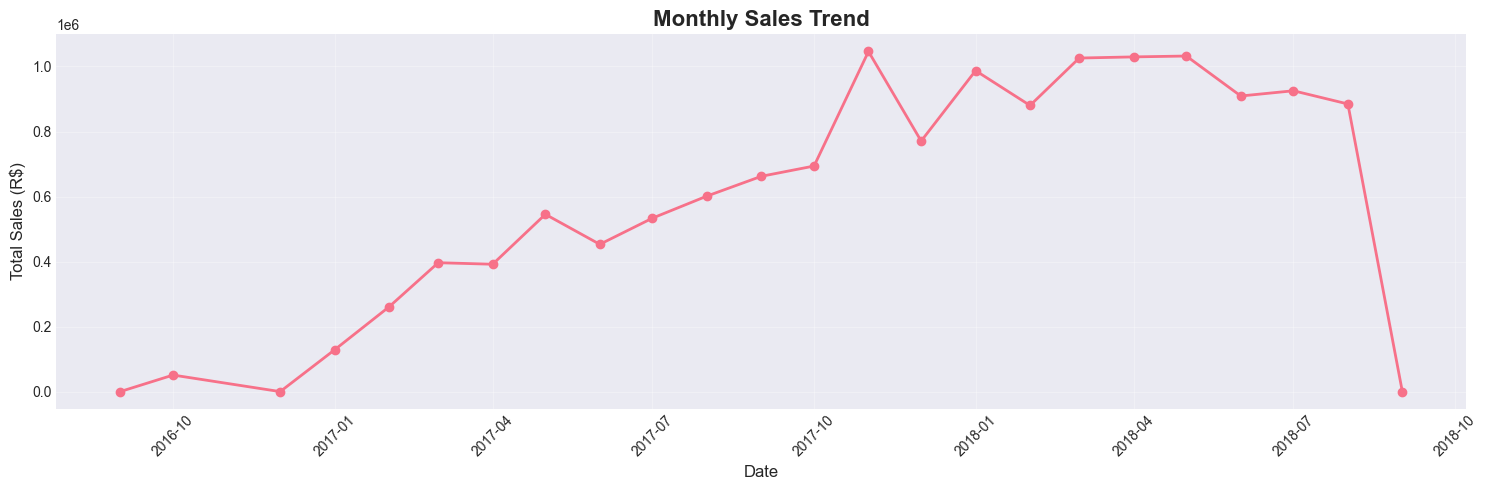

✓ Saved: monthly_sales_trend.png


In [ ]:

# Visualization 1: Sales Trend Over Time
plt.figure(figsize=(15, 5))
monthly_sales = sales_data.groupby(sales_data['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: monthly_sales_trend.png")


In [ ]:
print(sales_data.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'year', 'month', 'day',
       'dayofweek', 'quarter', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_value', 'customer_city', 'customer_state',
       'product_category_name_english_x', 'product_category_name_english_y'],
      dtype='object')


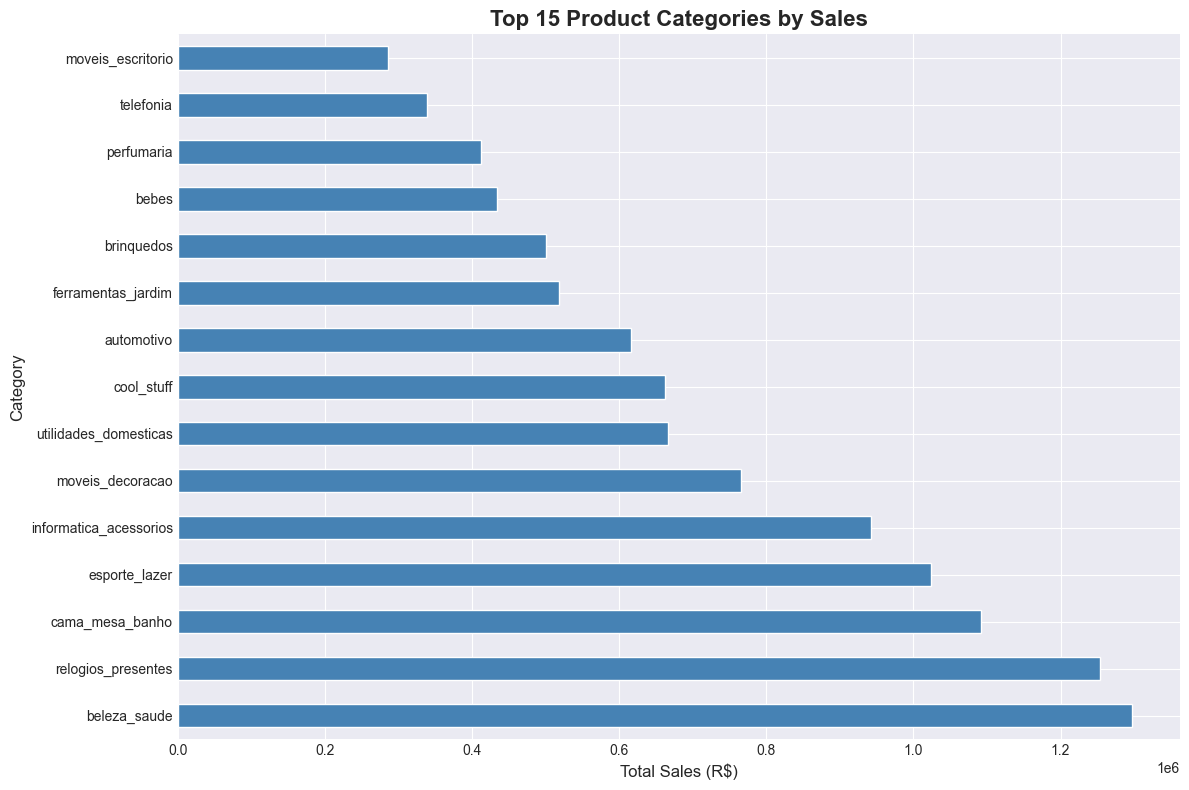

✓ Saved: category_sales.png


In [ ]:
plt.figure(figsize=(12, 8))
category_sales = sales_data.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(15)
category_sales.plot(kind='barh', color='steelblue')
plt.title('Top 15 Product Categories by Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales (R$)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.savefig('category_sales.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: category_sales.png")


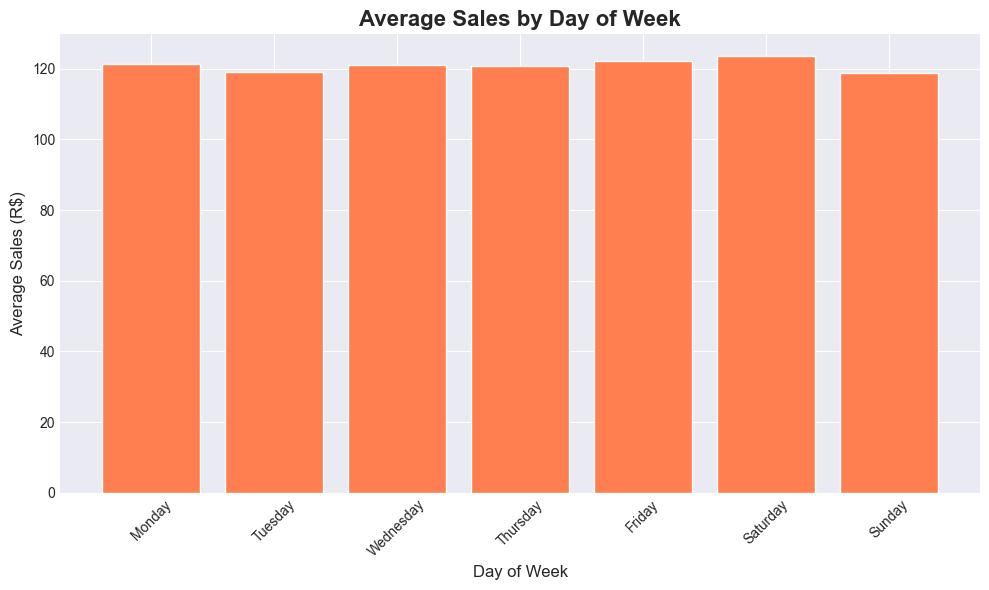

✓ Saved: dayofweek_sales.png


In [ ]:
# Visualization 3: Sales by Day of Week
plt.figure(figsize=(10, 6))
dow_sales = sales_data.groupby('dayofweek')['price'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(days, dow_sales.values, color='coral')
plt.title('Average Sales by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Sales (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('dayofweek_sales.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: dayofweek_sales.png")


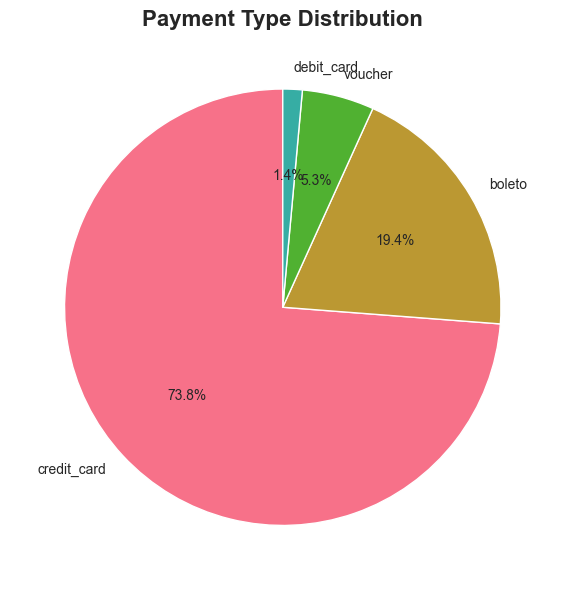

✓ Saved: payment_distribution.png


In [ ]:
# Visualization 4: Payment Type Distribution
plt.figure(figsize=(10, 6))
payment_dist = sales_data['payment_type'].value_counts()
plt.pie(payment_dist.values, labels=payment_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Type Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('payment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: payment_distribution.png")

In [ ]:
print("\n[STEP 3] Preprocessing data...")


[STEP 3] Preprocessing data...


In [ ]:
# Create aggregated daily sales for prediction
daily_sales = sales_data.groupby(sales_data['order_purchase_timestamp'].dt.date).agg({
    'price': 'sum',
    'order_id': 'nunique',
    'product_id': 'count',
    'freight_value': 'sum',
    'payment_value': 'sum'
}).reset_index()

daily_sales.columns = ['date', 'total_sales', 'num_orders', 'num_items', 'total_freight', 'total_payment']
daily_sales['date'] = pd.to_datetime(daily_sales['date'])


In [ ]:
# Add temporal features
daily_sales['year'] = daily_sales['date'].dt.year
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['day'] = daily_sales['date'].dt.day
daily_sales['dayofweek'] = daily_sales['date'].dt.dayofweek
daily_sales['quarter'] = daily_sales['date'].dt.quarter
daily_sales['is_weekend'] = daily_sales['dayofweek'].isin([5, 6]).astype(int)

In [ ]:
# Create lag features (previous day sales)
daily_sales = daily_sales.sort_values('date')
daily_sales['sales_lag_1'] = daily_sales['total_sales'].shift(1)
daily_sales['sales_lag_7'] = daily_sales['total_sales'].shift(7)
daily_sales['sales_rolling_7'] = daily_sales['total_sales'].rolling(window=7).mean()
daily_sales['sales_rolling_30'] = daily_sales['total_sales'].rolling(window=30).mean()


In [ ]:
# Drop rows with NaN values from lag features
daily_sales = daily_sales.dropna()

In [ ]:
# Calculate average order value
daily_sales['avg_order_value'] = daily_sales['total_sales'] / daily_sales['num_orders']


In [ ]:
print(f"✓ Daily sales dataset shape: {daily_sales.shape}")
print(f"✓ Date range: {daily_sales['date'].min()} to {daily_sales['date'].max()}")
print(f"\nFeatures for modeling: {daily_sales.columns.tolist()}")

✓ Daily sales dataset shape: (587, 17)
✓ Date range: 2017-01-21 00:00:00 to 2018-09-03 00:00:00

Features for modeling: ['date', 'total_sales', 'num_orders', 'num_items', 'total_freight', 'total_payment', 'year', 'month', 'day', 'dayofweek', 'quarter', 'is_weekend', 'sales_lag_1', 'sales_lag_7', 'sales_rolling_7', 'sales_rolling_30', 'avg_order_value']


In [ ]:
print("\n[STEP 4] Training prediction models...")


[STEP 4] Training prediction models...


In [ ]:
# Prepare features and target
feature_columns = ['year', 'month', 'day', 'dayofweek', 'quarter', 'is_weekend',
                   'num_orders', 'num_items', 'total_freight', 'sales_lag_1', 
                   'sales_lag_7', 'sales_rolling_7', 'sales_rolling_30']

X = daily_sales[feature_columns]
y = daily_sales['total_sales']



In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print(f"\n✓ Training set size: {X_train.shape[0]} days")
print(f"✓ Testing set size: {X_test.shape[0]} days")



✓ Training set size: 469 days
✓ Testing set size: 118 days


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Random Forest model
print("\n→ Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


→ Training Random Forest model...


In [ ]:
# Train Gradient Boosting model
print("→ Training Gradient Boosting model...")
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)


→ Training Gradient Boosting model...


In [ ]:
print("\n[STEP 5] Evaluating models...")



[STEP 5] Evaluating models...


In [ ]:
# Random Forest metrics
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print("\n--- Random Forest Results ---")
print(f"MAE: R$ {rf_mae:,.2f}")
print(f"RMSE: R$ {rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.4f}")



--- Random Forest Results ---
MAE: R$ 3,664.64
RMSE: R$ 4,813.16
R² Score: 0.8344


In [ ]:
# Gradient Boosting metrics
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)


In [ ]:
# Choose best model
best_model = rf_model if rf_r2 > gb_r2 else gb_model
best_model_name = "Random Forest" if rf_r2 > gb_r2 else "Gradient Boosting"
print(f"\n✓ Best model: {best_model_name}")



✓ Best model: Random Forest


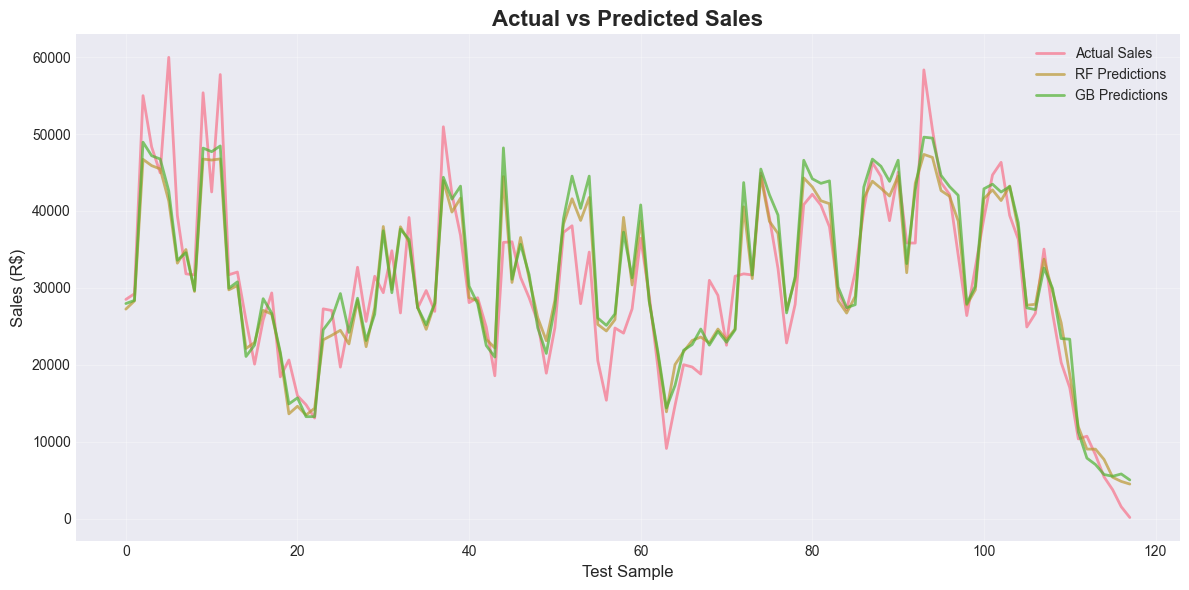

✓ Saved: predictions_comparison.png


In [ ]:
# Visualization 5: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', linewidth=2, alpha=0.7)
plt.plot(rf_pred, label='RF Predictions', linewidth=2, alpha=0.7)
plt.plot(gb_pred, label='GB Predictions', linewidth=2, alpha=0.7)
plt.title('Actual vs Predicted Sales', fontsize=16, fontweight='bold')
plt.xlabel('Test Sample', fontsize=12)
plt.ylabel('Sales (R$)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: predictions_comparison.png")

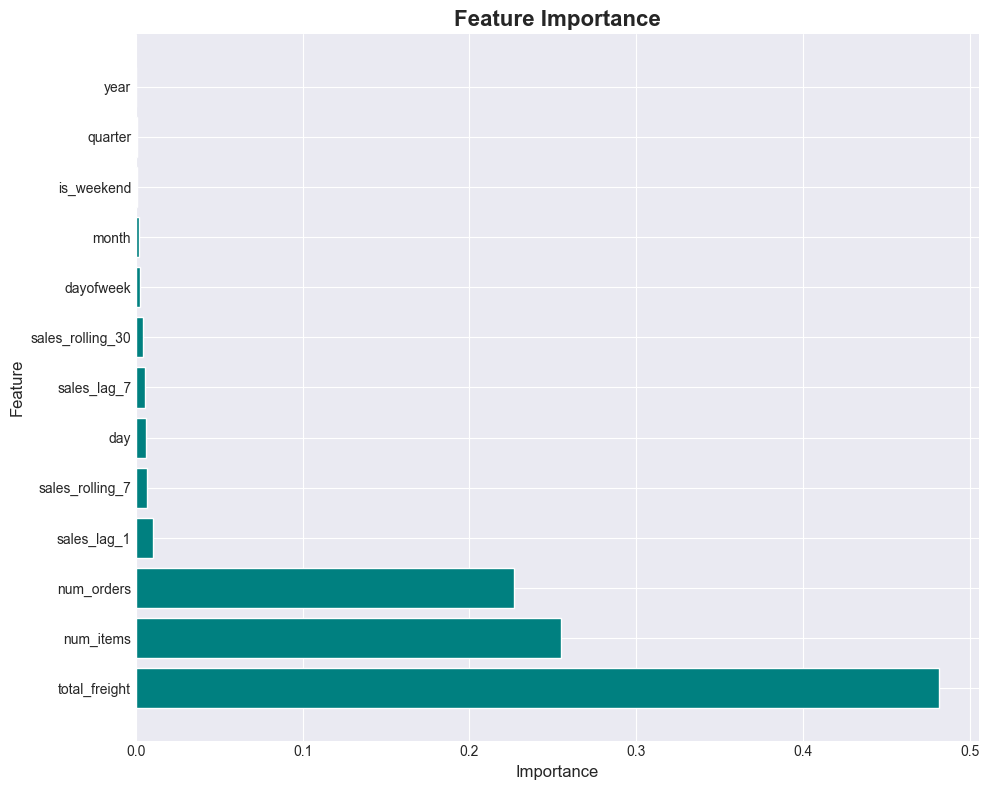

✓ Saved: feature_importance.png


In [ ]:
# Visualization 6: Feature Importance
plt.figure(figsize=(10, 8))
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.barh(feature_importance['feature'], feature_importance['importance'], color='teal')
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: feature_importance.png")

In [ ]:
print("\n[STEP 6] Saving model and preprocessing objects...")


[STEP 6] Saving model and preprocessing objects...


In [ ]:

# Save the model
with open('sales_predictor_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✓ Saved: sales_predictor_model.pkl")


✓ Saved: sales_predictor_model.pkl


In [ ]:

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Saved: scaler.pkl")

✓ Saved: scaler.pkl


In [ ]:

# Save feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)
print("✓ Saved: feature_columns.pkl")

✓ Saved: feature_columns.pkl


In [ ]:
# Save model metadata
metadata = {
    'model_name': best_model_name,
    'mae': rf_mae if best_model_name == "Random Forest" else gb_mae,
    'rmse': rf_rmse if best_model_name == "Random Forest" else gb_rmse,
    'r2': rf_r2 if best_model_name == "Random Forest" else gb_r2,
    'feature_columns': feature_columns,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)
print("✓ Saved: model_metadata.pkl")


✓ Saved: model_metadata.pkl


In [ ]:
# Save some statistics for the app
stats = {
    'avg_daily_sales': daily_sales['total_sales'].mean(),
    'max_daily_sales': daily_sales['total_sales'].max(),
    'min_daily_sales': daily_sales['total_sales'].min(),
    'total_revenue': sales_data['price'].sum(),
    'total_orders': sales_data['order_id'].nunique(),
    'avg_order_value': sales_data.groupby('order_id')['price'].sum().mean()
}

with open('sales_statistics.pkl', 'wb') as f:
    pickle.dump(stats, f)
print("✓ Saved: sales_statistics.pkl")

✓ Saved: sales_statistics.pkl


In [ ]:
print("\n" + "="*80)
print("MODEL TRAINING COMPLETE!")
print("="*80)
print(f"\nModel Performance ({best_model_name}):")
print(f"  • R² Score: {metadata['r2']:.4f}")
print(f"  • MAE: R$ {metadata['mae']:,.2f}")
print(f"  • RMSE: R$ {metadata['rmse']:,.2f}")
print(f"\nFiles generated:")
print("  1. sales_predictor_model.pkl")
print("  2. scaler.pkl")
print("  3. feature_columns.pkl")
print("  4. model_metadata.pkl")
print("  5. sales_statistics.pkl")
print("  6. monthly_sales_trend.png")
print("  7. category_sales.png")
print("  8. dayofweek_sales.png")
print("  9. payment_distribution.png")
print(" 10. predictions_comparison.png")
print(" 11. feature_importance.png")
print("\n✓ Ready to use in Streamlit application!")
print("="*80)


MODEL TRAINING COMPLETE!

Model Performance (Random Forest):
  • R² Score: 0.8344
  • MAE: R$ 3,664.64
  • RMSE: R$ 4,813.16

Files generated:
  1. sales_predictor_model.pkl
  2. scaler.pkl
  3. feature_columns.pkl
  4. model_metadata.pkl
  5. sales_statistics.pkl
  6. monthly_sales_trend.png
  7. category_sales.png
  8. dayofweek_sales.png
  9. payment_distribution.png
 10. predictions_comparison.png
 11. feature_importance.png

✓ Ready to use in Streamlit application!
